In [1]:
import numpy as np
import matplotlib.pyplot as plt
import folium
import pyproj
import warnings

In [47]:
# Трилатерация
def trialatation(P1, P2, P3, R1, R2, R3, get_info=False) -> list:
    
    p1 = np.array([0, 0, 0])
    p2 = np.array([P2[0] - P1[0], P2[1] - P1[1], P2[2] - P1[2]])
    p3 = np.array([P3[0] - P1[0], P3[1] - P1[1], P3[2] - P1[2]])

    # Вектора
    v1 = p2-p1
    v2 = p3-p1

    Xn = (v1)/np.linalg.norm(v1)

    tmp = np.cross(v1, v2)

    Zn = (tmp)/np.linalg.norm(tmp)

    Yn = np.cross(Xn, Zn)

    i = np.dot(Xn, v2)
    d = np.dot(Xn, v1)
    j = np.dot(Xn, v2)

    X = ((R1**2)-(R2**2)+(d**2))/(2*d)
    Y = (((R1**2)-(R3**2)+(i**2)+(j**2))/(2*j))-((i/j)*(X))
    
    if R1**2-X**2-Y**2 < 0:
        return 0,0
    
    Z1 = np.sqrt(max(0,R1**2-X**2-Y**2))
    Z2 = -Z1

    
    K1 = P1 + X*Xn + Y * Yn + Z1 * Zn
    K2 = P1 + X*Xn + Y * Yn - Z2 * Zn
    
    if get_info == True:
        print(f'{P1=}')
        print(f'{P2=}')
        print(f'{P3=}')
        
        print(f'{R1=}')
        print(f'{R2=}')
        print(f'{R3=}')
        
        print(f'{p1=}')
        print(f'{p2=}')
        print(f'{p3=}')
        
        print(f'{v1=}')
        print(f'{v2=}')
        
        print(f'{Xn=}')
        print(f'{Yn=}')
        print(f'{tmp=}')
        print(f'{Zn=}')
        
        print(f'{i=}')
        print(f'{d=}')
        print(f'{j=}')
        
        
        print(f'{X=}')
        print(f'{Y=}')
        print(f'{Z1=}')
        print(f'{Z2=}')
        print(f'{K1=}')
        print(f'{K2=}')
        print('-------------------')
        
    else:
        print('test:', R1**2-X**2-Y**2)
    
    return(K1)

In [48]:
# Конвертация в долготы и широты
def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

In [49]:
# Конвертация в X и Y
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

In [50]:
# Координаты станций
import warnings
warnings.filterwarnings("ignore")

STATION_3_map = [53.208388, 50.259608] # np.round([53.208388, 50.259608], 6)                      #[53.208388, 50.259608]  
STATION_4_map = [53.209152, 50.259474] # np.round([53.2094077773538,  50.25935579472478], 6)      #[53.209152, 50.259474]  
STATION_5_map = [53.208839, 50.259005] # np.round([ 53.2093098395169, 50.259735421579364], 6)     #[53.208839, 50.259005]  
STATION_6_map = [53.208654, 50.260126] # np.round([53.20868185920381,   50.25927059195832], 6)    #[53.208654, 50.260126]  

# basis 53.208739, 50.259086
# basis vector_coord [53.20874, 50.25855]
STATION_3 = lonlat_to_xy(STATION_3_map[0], STATION_3_map[1]) + (160.5,)#+ (160.5,)
STATION_4 = lonlat_to_xy(STATION_4_map[0], STATION_4_map[1]) + (160.5, )#+ (160.5,)
STATION_5 = lonlat_to_xy(STATION_5_map[0], STATION_5_map[1]) + (161.,  )#+ (161,)
STATION_6 = lonlat_to_xy(STATION_6_map[0], STATION_6_map[1]) + (160.05,)#+ (160.05,)

In [51]:
# Распарсивание файла по времени

# дистанции с подстанций [[],[],[]]
dist_list = []
distations = [] # список дестанций со всего временного промежутка

stations_list = [] # нумерация станций со всего временного промежутка
stations = []# нумерация станций 

time_list = []
times = []

with open(r"src\dist_log\log_2.txt", "r", encoding="utf-8") as log:
    for line in log:
        
        if times.count(line.split(':')[2]) != 0:
            distations.append(float(line.split(':')[5]))
            stations.append(int(line.split(':')[4].split('\t')[0]))
            
        else:
            dist_list.append(distations)
            time_list.append(times)
            stations_list.append(stations)
            
            distations = [float(line.split(':')[5])]
            times = [line.split(':')[2]]
            stations = [int(line.split(':')[4].split('\t')[0])]
            
dist_list.pop(0)
dist_list.pop(0)

stations_list.pop(0)
stations_list.pop(0) 
stations_list[-1]

[3, 4, 5, 6]

In [52]:
# Расчет позиции
warnings.filterwarnings("ignore")


geoposition_list = []

STATION_DICT = {3:STATION_3, 4:STATION_4, 5:STATION_5, 6:STATION_6}

for i in range(len(dist_list)):
    
    if len(dist_list[i]) >= 3:
        position = trialatation(P1=STATION_DICT[stations_list[i][0]],
                                P2=STATION_DICT[stations_list[i][1]],
                                P3=STATION_DICT[stations_list[i][2]],
                                R1=dist_list[i][0],
                                R2=dist_list[i][1],
                                R3=dist_list[i][2],)
        
        position = xy_to_lonlat(position[0], position[1])
        geoposition_list.append(position)

test: 449.24056018311535
test: 450.892737599379
test: 448.8060191377031
test: 450.08268939239156
test: 446.42374403930296
test: 441.49579778686297
test: 439.7377549670463
test: 438.982608278293
test: 437.6544934414677
test: 442.5836054971321
test: 446.3418601473062
test: 448.0162330569193
test: 442.7503189232626
test: 440.67378043221
test: 441.6701222365979
test: 443.1617445000054
test: 445.55288878228225
test: 445.8631735415752
test: 446.11216048951536
test: 446.8171852437231
test: 452.18356215802197
test: 449.38518487216743
test: 446.9561988471356
test: 443.079382524045
test: 441.75855609911616
test: 440.3438229775384
test: 441.0852178968746
test: 436.59752627044014
test: 426.0901798242942
test: 427.3750138257694
test: 428.12268300146445
test: 429.1620379994007
test: 427.36454601475555
test: 427.97707271396166
test: 429.20166967853686
test: 430.2948667141703
test: 429.55099151439424
test: 431.4955862592426
test: 433.1023226284869
test: 432.53745770778454
test: 429.8744541638684
test:

In [53]:
# Создаём карту мира
map = folium.Map(location=(53.208388, 50.259608), zoom_start=100)

folium.Marker(STATION_3_map, '3').add_to(map)
folium.Marker(STATION_4_map, '4').add_to(map)
folium.Marker(STATION_5_map, '5').add_to(map)
folium.Marker(STATION_6_map, '6').add_to(map)

folium.Marker([53.208388, 50.259608], '3 REAL').add_to(map)
folium.Marker([53.209152, 50.259474], '4 REAL').add_to(map)
folium.Marker([53.208839, 50.259005], '5 REAL').add_to(map)
folium.Marker([53.208654, 50.260126], '6 REAL').add_to(map)

for i in range(len(geoposition_list)):
    telephone_position = folium.map.FeatureGroup()
    # style the feature group
    telephone_position.add_child(
        folium.features.CircleMarker(
            [geoposition_list[i][0], geoposition_list[i][1]], radius = 2,    
            color = 'red', fill_color = 'Red'
        )
    )
    
    map.add_child(telephone_position)
map.save("trilateration_map.html")

In [54]:
map = folium.Map(location=(53.208388, 50.259608), zoom_start=100)
folium.Marker(STATION_3_map, '3').add_to(map)
folium.Marker(STATION_4_map, '4').add_to(map)
folium.Marker(STATION_5_map, '5').add_to(map)
folium.Marker(STATION_6_map, '6').add_to(map)
map.save("point_map.html")

In [55]:
geoposition_list[:5]

[(10.511256115612785, 0.0),
 (10.511256115612785, 0.0),
 (10.511256115612785, 0.0),
 (10.511256115612785, 0.0),
 (10.511256115612785, 0.0)]

B_DIST=np.float64(7.0710678118654755)
AB=np.float64(7.0710678118654755)


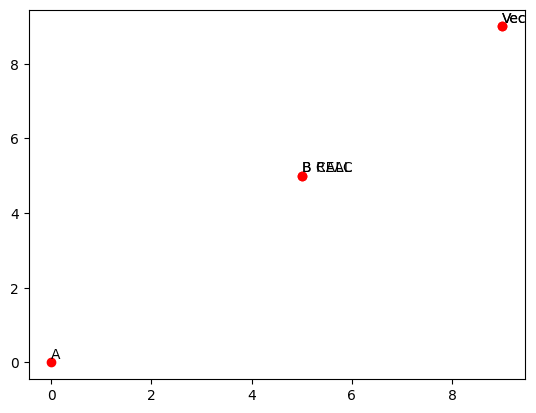

In [ ]:
import seaborn as sns

A_coord = [0, 0]

VEC_AB = [9, 9]

REAL_B = [5, 5]

B_DIST = np.linalg.norm([REAL_B[0]-A_coord[0], 
                     REAL_B[1]-A_coord[1]])

AB = B_DIST

print(f'{B_DIST=}')

AB

size_vector = np.sqrt(VEC_AB[0]*VEC_AB[0] + VEC_AB[1]*VEC_AB[1])


calc_B = [A_coord[0] + AB * VEC_AB[0] / size_vector,
          A_coord[1] + AB * VEC_AB[1] / size_vector]

# AB = np.linalg.norm([VEC_AB[0]-A_coord[0], 
#                      VEC_AB[1]-A_coord[1]])

# lambda_value = AB / np.linalg.norm(np.array([VEC_AB[0], VEC_AB[1]]))
        
# calc_B = [(A_coord[0] + lambda_value * VEC_AB[0]) / (1 + lambda_value),
#           (A_coord[1] + lambda_value * VEC_AB[1]) / (1 + lambda_value)]


plt.plot(A_coord[0], A_coord[1], 'ro')
plt.text(A_coord[0], A_coord[1]+0.1, 'A')

plt.plot(VEC_AB[0], VEC_AB[1], 'ro') 
plt.text(VEC_AB[0], VEC_AB[1]+0.1, 'Vec')

print(f'{AB=}')

plt.plot(VEC_AB[0], VEC_AB[1], 'ro') 
plt.text(VEC_AB[0], VEC_AB[1]+0.1, 'Vec')

plt.plot(REAL_B[0], REAL_B[1], 'ro') 
plt.text(REAL_B[0], REAL_B[1]+0.1, 'B REAL')

plt.plot(calc_B[0], calc_B[1], 'ro') 
plt.text(calc_B[0], calc_B[1]+0.1, 'B CALC')

plt.show()

In [2]:
import folium
A1 = [53.208435, 50.259642999]
B1 = [53.20902731136552,  50.25972487822265]
C1 = [53.20925935936746, 50.25918050888792]
D1 = [ 53.208617238483896, 50.25916870109169]


map = folium.Map(location=(53.208388, 50.259608), zoom_start=100)
folium.Marker(A1, '3').add_to(map)
folium.Marker(B1, '4').add_to(map)
folium.Marker(C1, '5').add_to(map)
folium.Marker(D1, '6').add_to(map)
map.save("point_map2.html")